### imagenet gather activities within a layer
because for each layer, the activity for each image was saved separately.

In [1]:
import os
import tensorflow as tf
import numpy as np
import pandas as pd 
import glob
import pickle
import tables
from glob import glob 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set(style = 'white', font_scale=1.3)

from qmvpa import rsa

%autosave 5

# constant paths 
imagenet_path = '/scratch/gpfs/qlu/ILSVRC2012'
condition = 'ILSVRC2012_img_val'
# alex net layers
layer_names = ['conv%d' % (l+1) for l in range(5)] + ['fc%d' % (l+1) for l in range(3)]
n_layers = 8
k_patches = 1
n_imgs = 50000

/home/qlu/.conda/envs/brainiak/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Autosaving every 5 seconds


In [2]:
subj_id = 4

# paths
ckpt_path = '/tigress/qlu/logs/ILSVRC2012/ckpt-alexnet%.2d' % (subj_id)
# construct the path to all images 
imagenet_test_im_path = os.path.join(imagenet_path, condition)
# construct the path to previously saved activities 
imagenet_act_root = os.path.join(ckpt_path, 'acts', condition)
# ... for each layer
imagenet_act_paths = {ln: os.path.join(imagenet_act_root, ln) for ln in layer_names}

print(imagenet_act_root)
# print(imagenet_act_paths)

/tigress/qlu/logs/ILSVRC2012/ckpt-alexnet04/acts/ILSVRC2012_img_val


In [29]:
n_imgs = 500

# do RSA for each layer 
layer_name = layer_names[1]
print(layer_name)
im_id = 1

# preallocate 
act_file = np.load(os.path.join(imagenet_act_paths[layer_name], 'img_%.8d.npz' % (1)))
n_units = np.shape(act_file['acts'])[1]
acts_l = np.zeros((n_imgs, n_units))

for im_id in range(n_imgs):
    act_file = np.load(os.path.join(imagenet_act_paths[layer_name], 'img_%.8d.npz' % (im_id + 1)))
    acts_l[im_id] = act_file['acts']

conv2


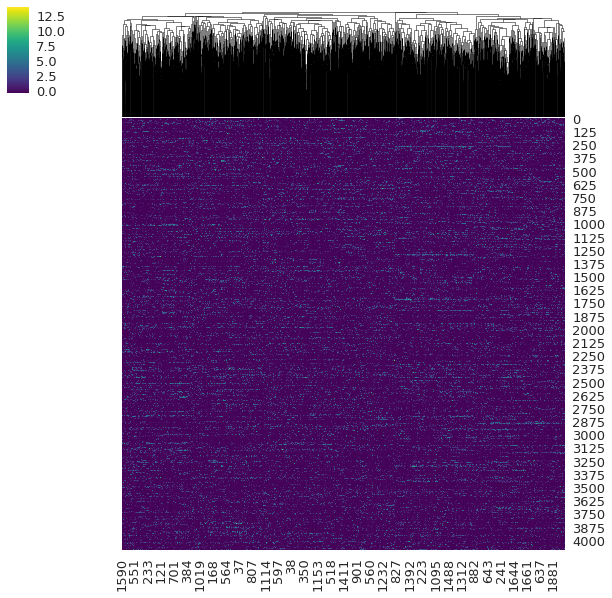

In [30]:
# sns.den(acts_l)
sns.clustermap(acts_l.T, cmap='viridis', 
               row_cluster = False, metric = 'correlation', z_score = 1)
# np.shape(acts_l)